In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dist = np.genfromtxt('data/mjd_dist_alt.csv', delimiter=',')

In [3]:
type(dist)
dist.ndim

2

In [4]:
print(dist[0])

[61050.83333333 61050.84375    61050.85416667 ... 61420.07291667
 61420.08333333 61420.09375   ]


In [5]:
mjd = dist[0:1]
bgd = dist[1:2]
alt = dist[2:3]

In [6]:
print(mjd[0])
print(bgd[0])


[61050.83333333 61050.84375    61050.85416667 ... 61420.07291667
 61420.08333333 61420.09375   ]
[6723.64712262 7056.57492873 7358.46849758 ... 9121.11019133 9410.48417136
 9662.61831719]


(61050.0, 61100.0)

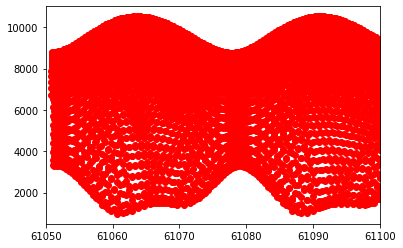

In [7]:
plt.plot(mjd[0],bgd[0],'ro')
plt.xlim(61050,61100)

Text(0, 0.5, 'BGD distance (km)')

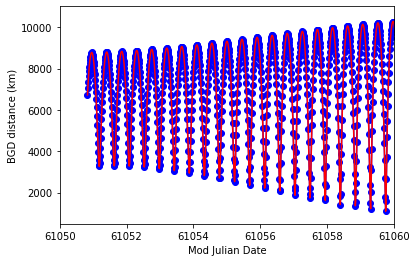

In [8]:
plt.plot(mjd[0],bgd[0],'bo-')
plt.plot(mjd[0],bgd[0],'r-')
plt.xlim(61050,61060)
plt.xlabel('Mod Julian Date')
plt.ylabel('BGD distance (km)')

In [9]:
# derivatives
d_bgd = np.diff(bgd[0])
d_mjd = np.diff(mjd[0])
vel = d_bgd / d_mjd

mid_time = (mjd[0][1:] + mjd[0][:-1]) / 2


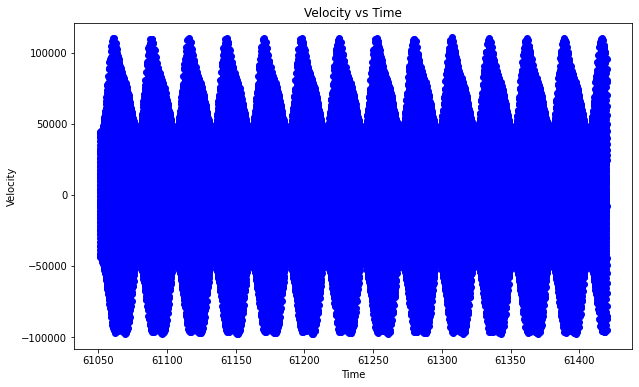

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(mid_time, vel, marker='o', linestyle='-', color='b')
plt.title('Velocity vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
# plt.xlim(61051,61052)
plt.show()

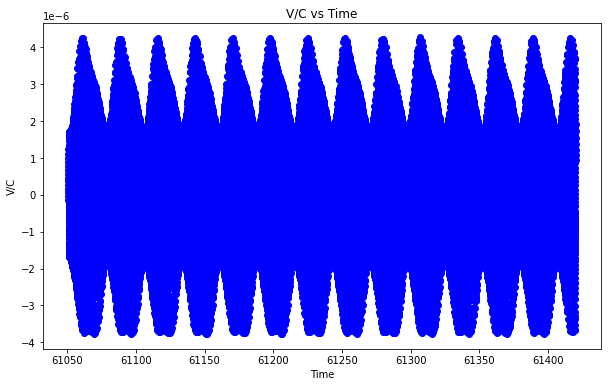

In [22]:
# doppler
c_kmpd = 3e5 * 3600 * 24 # speed of light adjusted to julian 'day' units
v_c = vel/c_kmpd

plt.figure(figsize=(10, 6))
plt.plot(mid_time, v_c,'bo')
plt.title('V/C vs Time')
plt.xlabel('Time')
plt.ylabel('V/C')
# plt.xlim(61051,61052)
plt.show()

In [12]:
# doppler derivatives
d_dop = np.diff(v_c)
d_mjd_mid = np.diff(mid_time)
acc = d_dop / d_mjd_mid

# print(acc.max())

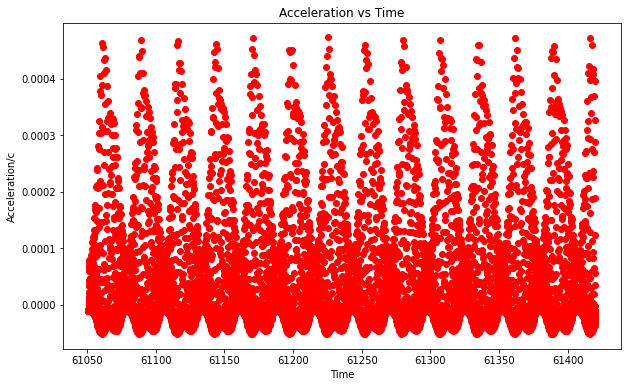

In [21]:
mid_time_acc = (mid_time[1:] + mid_time[:-1]) / 2

plt.figure(figsize=(10, 6))
plt.plot(mid_time_acc, acc,'ro')
plt.title('Acceleration vs Time')
plt.xlabel('Time')
plt.ylabel('Acceleration/c')
# plt.xlim(61051,61052)
plt.show()